# Benchmarking timeseries extraction workflow

For full reproducibility see the README and build a custom kernel with uv

In [1]:
import time
notebook_start = time.perf_counter()

import icechunk
import xarray as xr
import zarr

## Read the data back into xarray

In [2]:
# self contained read that works on the hub (make sure to run the pip install before)
storage = icechunk.s3_storage(
    bucket='nasa-veda-scratch',
    prefix=f"jbusecke/nasa-waterinsight-test-full/", # TODO:change this depening on the final location 
    anonymous=False,
    from_env=True,
)

config = icechunk.RepositoryConfig.default()
config.set_virtual_chunk_container(
    icechunk.VirtualChunkContainer(
        "s3://nasa-waterinsight/NLDAS3/forcing/daily/",
        icechunk.s3_store(region='us-west-2')
    )
)

virtual_credentials = icechunk.containers_credentials(
    {
        "s3://nasa-waterinsight/NLDAS3/forcing/daily/202201/": icechunk.s3_anonymous_credentials()
    }
)
    
repo = icechunk.Repository.open(
    storage=storage,
    config=config,
    authorize_virtual_chunk_access=virtual_credentials,
)

session = repo.readonly_session('main')
ds = xr.open_zarr(session.store, consolidated=False, zarr_version=3)
ds

/tmp/ipykernel_138254/1842095568.py:30: FutureWarning: zarr_version is deprecated, use zarr_format
  ds = xr.open_zarr(session.store, consolidated=False, zarr_version=3)
/home/jovyan/nldas-icechunk/.venv/lib/python3.12/site-packages/numcodecs/zarr3.py:145: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)


<xarray.Dataset> Size: 51TB
Dimensions:   (time: 8399, lat: 6500, lon: 11700)
Coordinates:
  * time      (time) datetime64[ns] 67kB 2001-01-02 2001-01-03 ... 2024-01-01
  * lon       (lon) float64 94kB -169.0 -169.0 -169.0 ... -52.03 -52.01 -52.0
  * lat       (lat) float64 52kB 7.005 7.015 7.025 7.035 ... 71.97 71.98 71.99
Data variables:
    PSurf     (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    SWdown    (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Qair      (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Rainf     (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Tair_min  (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Tair_max  (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    LWdown    (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Wind_N    (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Wind_E    (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Tair      (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        daily
    shortname:              NLDAS_FOR0010_D_3.0
    title:                  NLDAS Forcing Data L4 Daily 0.01 x 0.01 degree V3...
    version:                3.0 beta
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/v3/ ; https://li...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  7.005000114440918
    SOUTH_WEST_CORNER_LON:  -168.9949951171875
    DX:                     0.009999999776482582
    DY:                     0.009999999776482582

In [3]:
ds = ds.sel(time=slice('2000-01', '2023-12'))
ds

<xarray.Dataset> Size: 51TB
Dimensions:   (time: 8398, lat: 6500, lon: 11700)
Coordinates:
  * time      (time) datetime64[ns] 67kB 2001-01-02 2001-01-03 ... 2023-12-31
  * lon       (lon) float64 94kB -169.0 -169.0 -169.0 ... -52.03 -52.01 -52.0
  * lat       (lat) float64 52kB 7.005 7.015 7.025 7.035 ... 71.97 71.98 71.99
Data variables:
    PSurf     (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    SWdown    (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Qair      (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Rainf     (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Tair_min  (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Tair_max  (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    LWdown    (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Wind_N    (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Wind_E    (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
    Tair      (time, lat, lon) float64 5TB dask.array<chunksize=(1, 500, 900), meta=np.ndarray>
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        daily
    shortname:              NLDAS_FOR0010_D_3.0
    title:                  NLDAS Forcing Data L4 Daily 0.01 x 0.01 degree V3...
    version:                3.0 beta
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/v3/ ; https://li...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  7.005000114440918
    SOUTH_WEST_CORNER_LON:  -168.9949951171875
    DX:                     0.009999999776482582
    DY:                     0.009999999776482582

## Testing a timeseries at a single location

In [4]:
# testing different cases (uncomment case to benchmark and run the entire notebook to time)
# Values are not in coordinate units, just logical indicies

# ## single point
# target_lon = [0]
# target_lat = [0]

# ## 5 points (making sure they span multiple chunks)
# target_lon = [0,0,0,11699, 11699]
# target_lat = [0,600,6000,0, 600]

## 10 points (making sure they span multiple chunks)
target_lon = [0,0,0,0,0,11699,11699,11699,11699,11699]
target_lat = [0,501,1002,1503,2004,0,501,1002,1503,2004]

selection = {
    'lon':xr.DataArray(target_lon, dims=['points']),
    'lat':xr.DataArray(target_lat, dims=['points'])}

In [5]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    timeseries = ds['Rainf'].isel(**selection).load() # load rainfall timeseries into memory

[########################################] | 100% Completed | 263.96 s


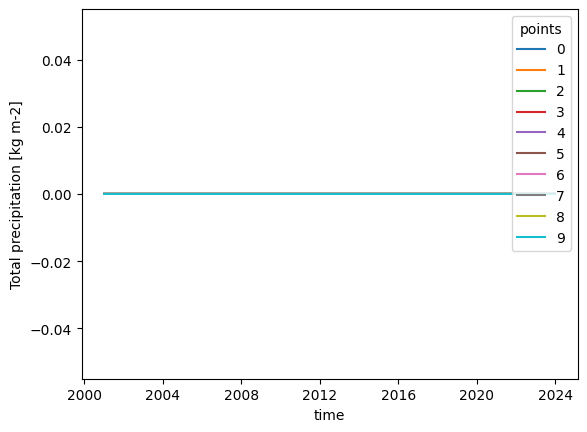

In [6]:
timeseries.plot(hue='points')

In [7]:
elapsed = time.perf_counter() - notebook_start
print(f"⏱️ Notebook executed in {elapsed:.2f} seconds")

⏱️ Notebook executed in 327.11 seconds
